# Assignment 7

*ZM MW*

q-voter model

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np

In [4]:
# #  if the node has less than 4 neighbors, they can't make him change his opinion 

# def model(g, independence, flexibility):
#     q = 4            # influence group
#     n = 80           # n spinson actions 
#     epsilon = 0.01   # probability of independent change of opinion while node is conformist
#     color_map = [None] * len(g)
#     for node in g:
#         color_map[node] = 'red'
#     for step in range(n):
#         list_of_nodes = list(g.nodes())
#         random.shuffle(list_of_nodes)               # we will check the nodes in random order
#         for node in list_of_nodes:
#             #node = g.nodes[n]
#             if random.random() < independence:      # if agent is independent
#                 if random.random() < flexibility:   # then he changes his mind with prob. equal flexibility
#                     if color_map[node] == 'red':    
#                         color_map[node] = 'green'
#                     else:
#                         color_map[node] = 'red'
#             else:                                     # if agent is not independent we check his neighbors
#                 if q > len(list(g.neighbors(node))):  # if we have less than 4 neighbors, we don't have enough neighbors 
#                     if random.random() < epsilon:     # to change our opinion, so we can change opinion with prob. epsilon
#                         if color_map[node] == 'red':
#                             color_map[node] = 'green'
#                         else:
#                             color_map[node] = 'red'
#                 else:                                 # if we have at least 4 neighbors we take randomly four of them
#                     neighborhood = random.sample([n for n in g.neighbors(node)], k=q)
#                     if len(set(np.array(color_map)[neighborhood])) == 1:        # we check if our neighbors have same opinion 
#                         color_map[node] = color_map[neighborhood[0]]  # if they have same opinion, we adjust to them
#                     else:                                             # if not, we can change opinion with prob. epsilon
#                         if random.random() < epsilon:
#                             if color_map[node] == 'red':
#                                 color_map[node] = 'green'
#                             else:
#                                 color_map[node] = 'red'
            
#     return np.mean(np.array(color_map) == 'red')

In [5]:
# if the node has less than 4 neighbors, it is still enough to make them change their opinion

def model(g, independence, flexibility):
    q = 4            # influence group
    n = 80           # n spinson actions 
    epsilon = 0.01   # probability of independent change of opinion while node is conformist
    color_map = [None] * len(g)
    for node in g:
        color_map[node] = 'red'
    for step in range(n):
        list_of_nodes = list(g.nodes())
        random.shuffle(list_of_nodes)               # we will check the nodes in random order
        for node in list_of_nodes:
            #node = g.nodes[n]
            if random.random() < independence:      # if agent is independent
                if random.random() < flexibility:   # then he changes his mind with prob. equal flexibility
                    if color_map[node] == 'red':    
                        color_map[node] = 'green'
                    else:
                        color_map[node] = 'red'
            else:                                     # if agent is not independent we check his neighbors
                if q > len(list(g.neighbors(node))):  # if we have less than 4 neighbors, we just adjust to all of them 
                    neighborhood = list(g.neighbors(node))       
                else:                                 # if we have at least 4 neighbors we take randomly four of them
                    neighborhood = random.sample([n for n in g.neighbors(node)], k=q)
                    
                if len(set(np.array(color_map)[neighborhood])) == 1:        # we check if our neighbors have same opinion 
                    color_map[node] = color_map[neighborhood[0]]  # if they have same opinion, we adjust to them
                else:                                             # if not, we can change opinion with prob. epsilon
                    if random.random() < epsilon:
                        if color_map[node] == 'red':
                            color_map[node] = 'green'
                        else:
                            color_map[node] = 'red'
            
    return np.mean(np.array(color_map) == 'red'), color_map

In [7]:
flexibility = np.round(np.arange(0.2,0.6,0.1),1)
independence = np.round(np.arange(0.05,1,0.05),2)
result_f = {key: [] for key in flexibility}
m = 4
MCS = 20
for f in flexibility:
    print('doing for f =', f)
    for p in independence:
        temp = 0
        for n in range(MCS):
            g = nx.barabasi_albert_graph(80, m)
            temp += model(g, independence=p, flexibility=f)[0]
        result_f[f].append(temp / MCS)
    print('done for f =', f)

doing for f = 0.2
done for f = 0.2
doing for f = 0.3
done for f = 0.3
doing for f = 0.4
done for f = 0.4
doing for f = 0.5
done for f = 0.5


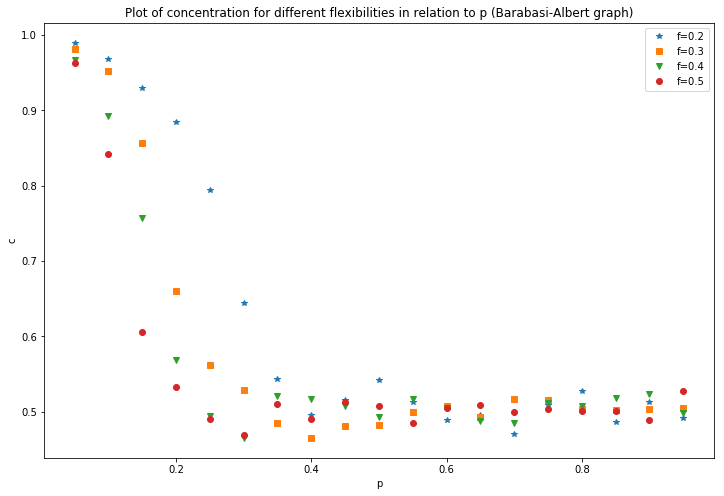

In [8]:
markers = ['*', 's', 'v', 'o']
i = 0
plt.figure(figsize=(12,8))
for r in result_f:
    plt.plot(independence, result_f[r], markers[i])
    i += 1
plt.xlabel('p')
plt.ylabel('c')
plt.legend(['f=0.2', 'f=0.3', 'f=0.4', 'f=0.5'])
plt.title('Plot of concentration for different flexibilities in relation to p (Barabasi-Albert graph)')
plt.show()

In [5]:
flexibility = np.round(np.arange(0.2,0.6,0.1),1)
independence = np.round(np.arange(0.05,1,0.05),2)
result_fc = {key: [] for key in flexibility}
MCS = 20
for f in flexibility:
    print('doing for f =', f)
    for p in independence:
        temp = 0
        for n in range(MCS):
            g = nx.complete_graph(80)
            temp += model(g, independence=p, flexibility=f)[0]
        result_fc[f].append(temp / MCS)
    print('done for f =', f)

doing for f = 0.2
done for f = 0.2
doing for f = 0.3
done for f = 0.3
doing for f = 0.4
done for f = 0.4
doing for f = 0.5
done for f = 0.5


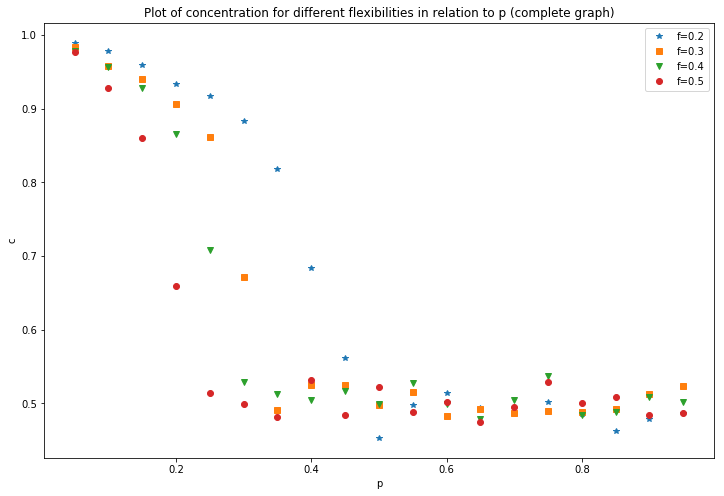

In [6]:
markers = ['*', 's', 'v', 'o']
i = 0
plt.figure(figsize=(12,8))
for r in result_fc:
    plt.plot(independence, result_fc[r], markers[i])
    i += 1
plt.xlabel('p')
plt.ylabel('c')
plt.legend(['f=0.2', 'f=0.3', 'f=0.4', 'f=0.5'])
plt.title('Plot of concentration for different flexibilities in relation to p (complete graph)')
plt.show()

In [3]:
# M = [2, 3, 4, 6, 8, 10]
M = [3,6,9]
independence = np.round(np.arange(0.05,1,0.05),2)
result_m = {key: [] for key in M}
result_cg = []
f = 0.5
MCS = 50

for m in M:
    print('doing for M = ', m)
    for p in independence:
        temp1 = 0
        for n in range(MCS):
            g1 = nx.barabasi_albert_graph(100, m)
            temp1 += model(g1, independence=p, flexibility=f)[0]
        result_m[m].append(temp1 / MCS)
print ('doing for Complete Graph')
for p in independence:
    temp2 = 0
    for n in range(MCS):
        g2 = nx.complete_graph(100)
        temp2 += model(g2, independence=p, flexibility=f)[0]
    result_cg.append(temp2 / MCS)


doing for M =  3
doing for M =  6
doing for M =  9
doing for Complete Graph


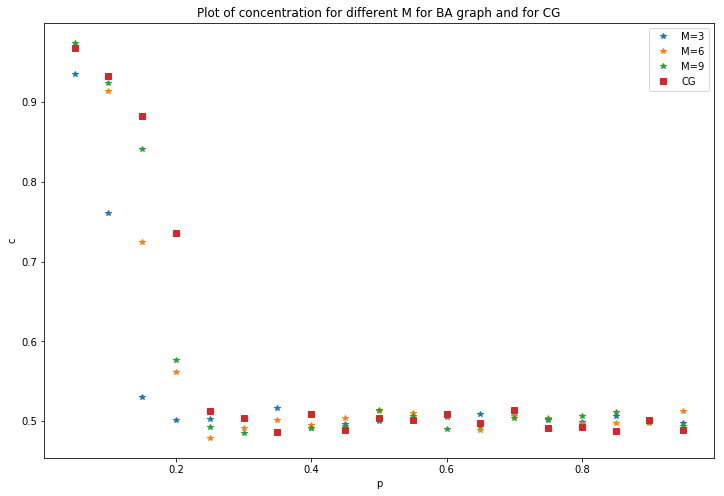

In [4]:
plt.figure(figsize=(12,8))
for r in result_m:
    plt.plot(independence, result_m[r], '*')
plt.plot(independence, result_cg, 's')
plt.xlabel('p')
plt.ylabel('c')
plt.legend(['M=3', 'M=6', 'M=9', 'CG'])
plt.title('Plot of concentration for different M for BA graph and for CG')
plt.show()

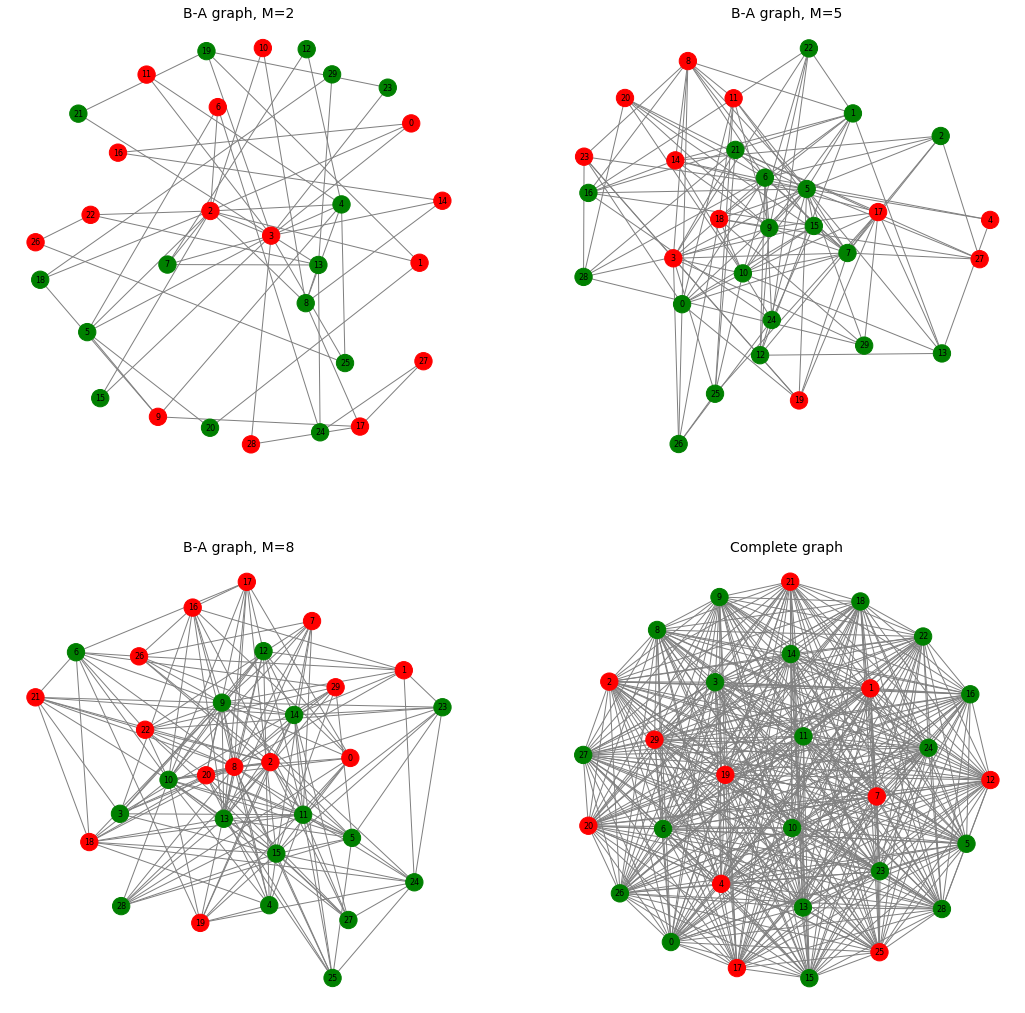

In [6]:
independence = 0.7
flexibility = 0.2

fig, axs = plt.subplots(2,2, figsize=(18, 18))
axs = axs.ravel()
G = nx.barabasi_albert_graph(30, 2)
color = model(G,independence,flexibility)[1]
pos = nx.spring_layout(G, k = 3, iterations = 100)
nx.draw(G, pos, with_labels = True, font_size=8, node_color=color, edge_color='gray', ax=axs[0])
axs[0].set_title("B-A graph, M=2", fontdict = {'fontsize' : 14})

G = nx.barabasi_albert_graph(30, 5)
color = model(G,independence,flexibility)[1]
pos = nx.spring_layout(G, k = 3, iterations = 100)
nx.draw(G, pos, with_labels = True, font_size=8, node_color=color, edge_color='gray', ax=axs[1])
axs[1].set_title("B-A graph, M=5", fontdict = {'fontsize' : 14})

G = nx.barabasi_albert_graph(30, 8)
color = model(G,independence,flexibility)[1]
pos = nx.spring_layout(G, k = 3, iterations = 100)
nx.draw(G, pos, with_labels = True, font_size=8, node_color=color, edge_color='gray', ax=axs[2])
axs[2].set_title("B-A graph, M=8", fontdict = {'fontsize' : 14})

G = nx.complete_graph(30)
color = model(G,independence,flexibility)[1]
pos = nx.spring_layout(G, k = 3, iterations = 100)
nx.draw(G, pos, with_labels = True, font_size=8, node_color=color, edge_color='gray', ax=axs[3])
axs[3].set_title("Complete graph", fontdict = {'fontsize' : 14})
plt.show()